
Processing Dataset 1 with Cross-Validation and Visualization...
Loading file: /Users/samyakjain/ML_Project_Jain/TrainData/TrainData1.txt
Data before preprocessing: (150, 3312)
Data after preprocessing and scaling: (150, 3312)
Performing 5-fold cross-validation...
Cross-validation accuracies: [0.83333333 0.9        0.9        0.93333333 0.93333333]
Mean accuracy: 0.90
Cross-validation completed for /Users/samyakjain/ML_Project_Jain/TrainData/TrainData1.txt. Mean Accuracy: 0.90
Visualizing Feature Importance...


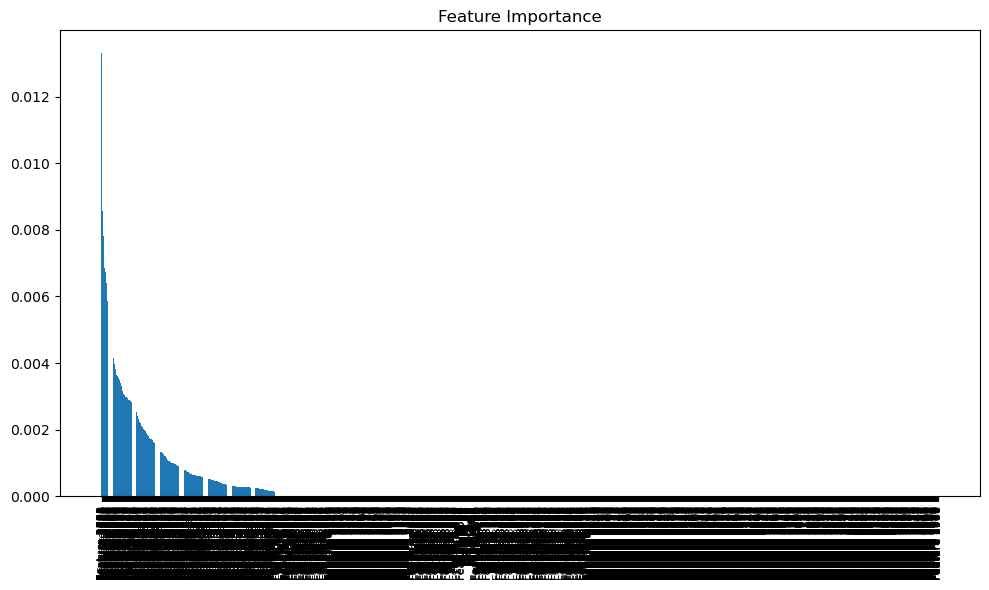

Visualizing a Single Decision Tree...


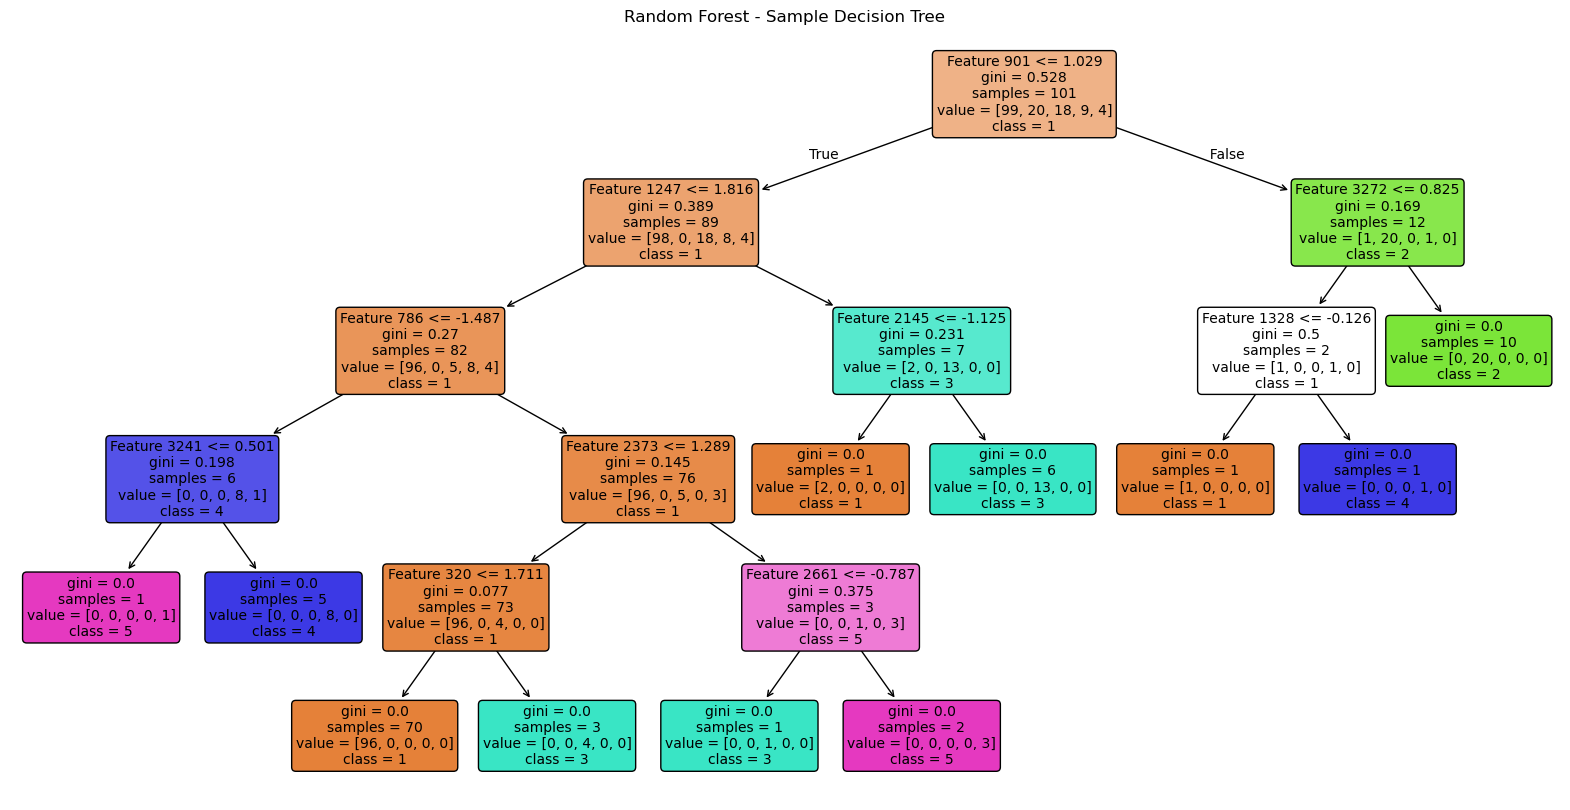


Processing Dataset 2 with Cross-Validation and Visualization...
Loading file: /Users/samyakjain/ML_Project_Jain/TrainData/TrainData2.txt
Data before preprocessing: (100, 9182)
Data after preprocessing and scaling: (100, 9182)
Performing 5-fold cross-validation...
Cross-validation accuracies: [0.95 0.8  0.9  0.85 0.95]
Mean accuracy: 0.89
Cross-validation completed for /Users/samyakjain/ML_Project_Jain/TrainData/TrainData2.txt. Mean Accuracy: 0.89
Visualizing Feature Importance...


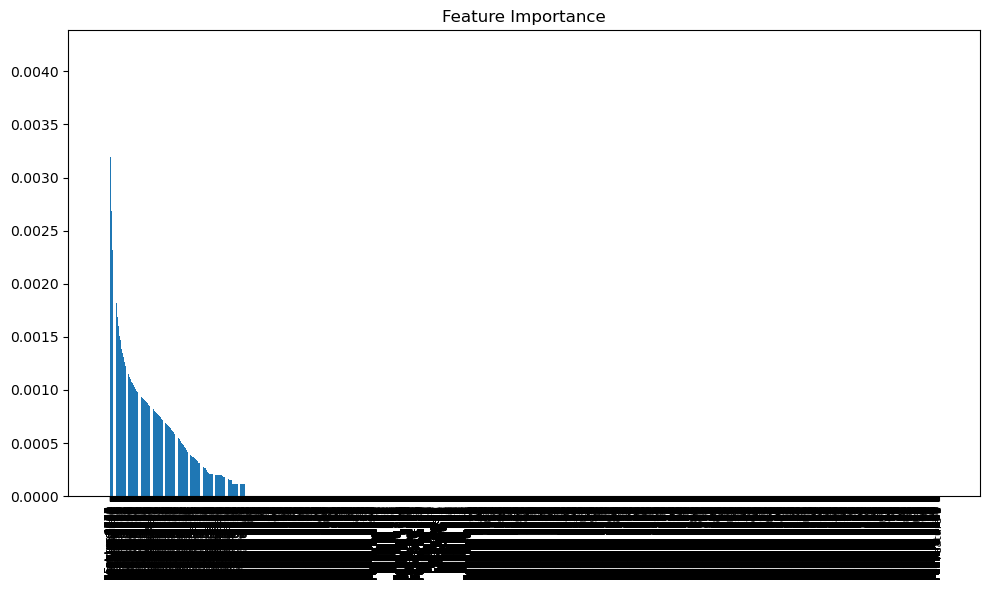

Visualizing a Single Decision Tree...


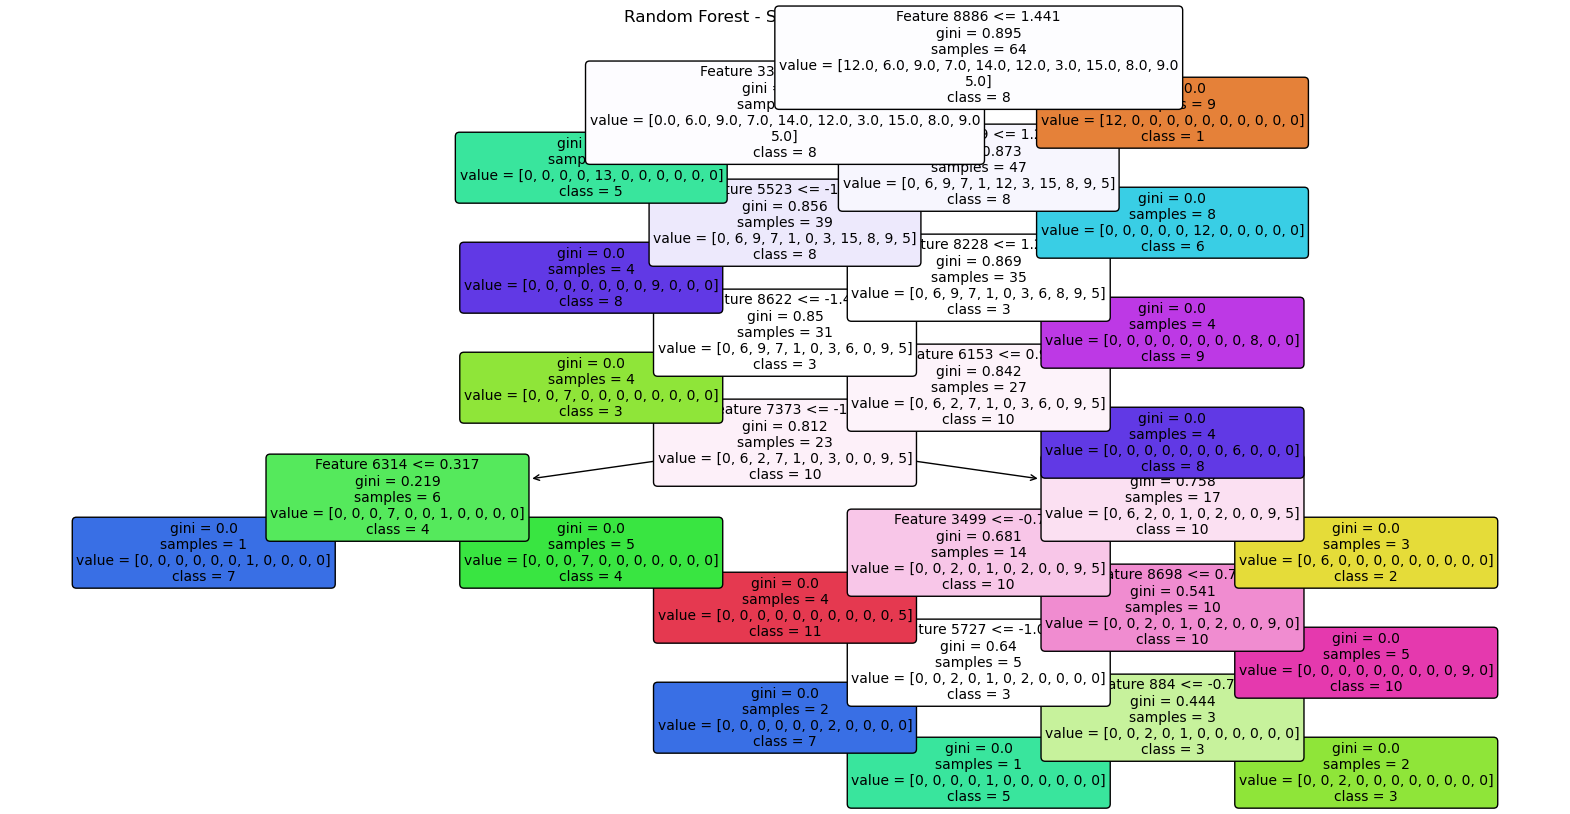


Processing Dataset 3 with Cross-Validation and Visualization...
Loading file: /Users/samyakjain/ML_Project_Jain/TrainData/TrainData3.txt
Data before preprocessing: (6300, 13)
Data after preprocessing and scaling: (6300, 13)
Performing 5-fold cross-validation...
Cross-validation accuracies: [0.32142857 0.31031746 0.32698413 0.31428571 0.31984127]
Mean accuracy: 0.32
Cross-validation completed for /Users/samyakjain/ML_Project_Jain/TrainData/TrainData3.txt. Mean Accuracy: 0.32
Visualizing Feature Importance...


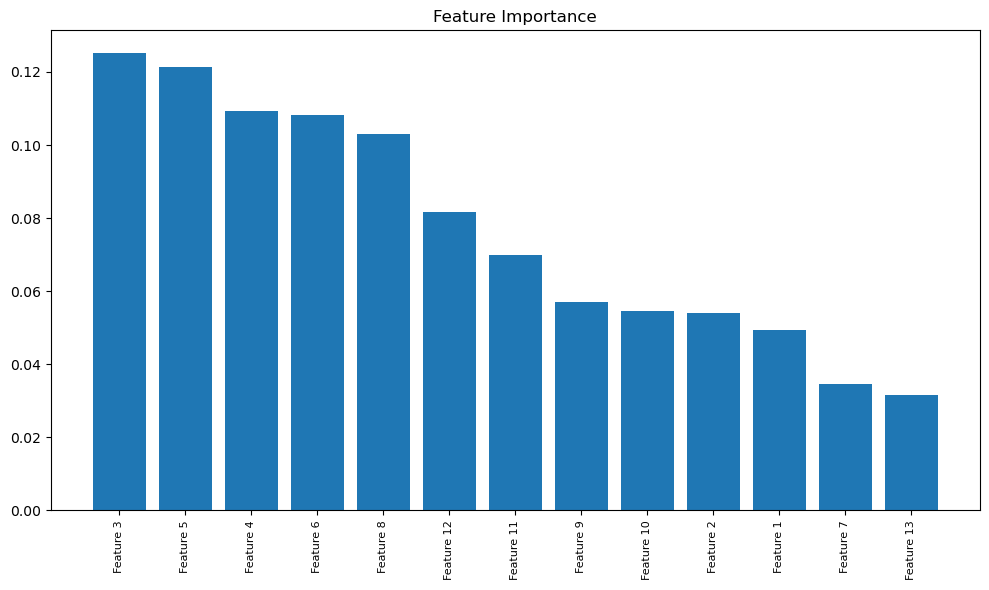

Visualizing a Single Decision Tree...


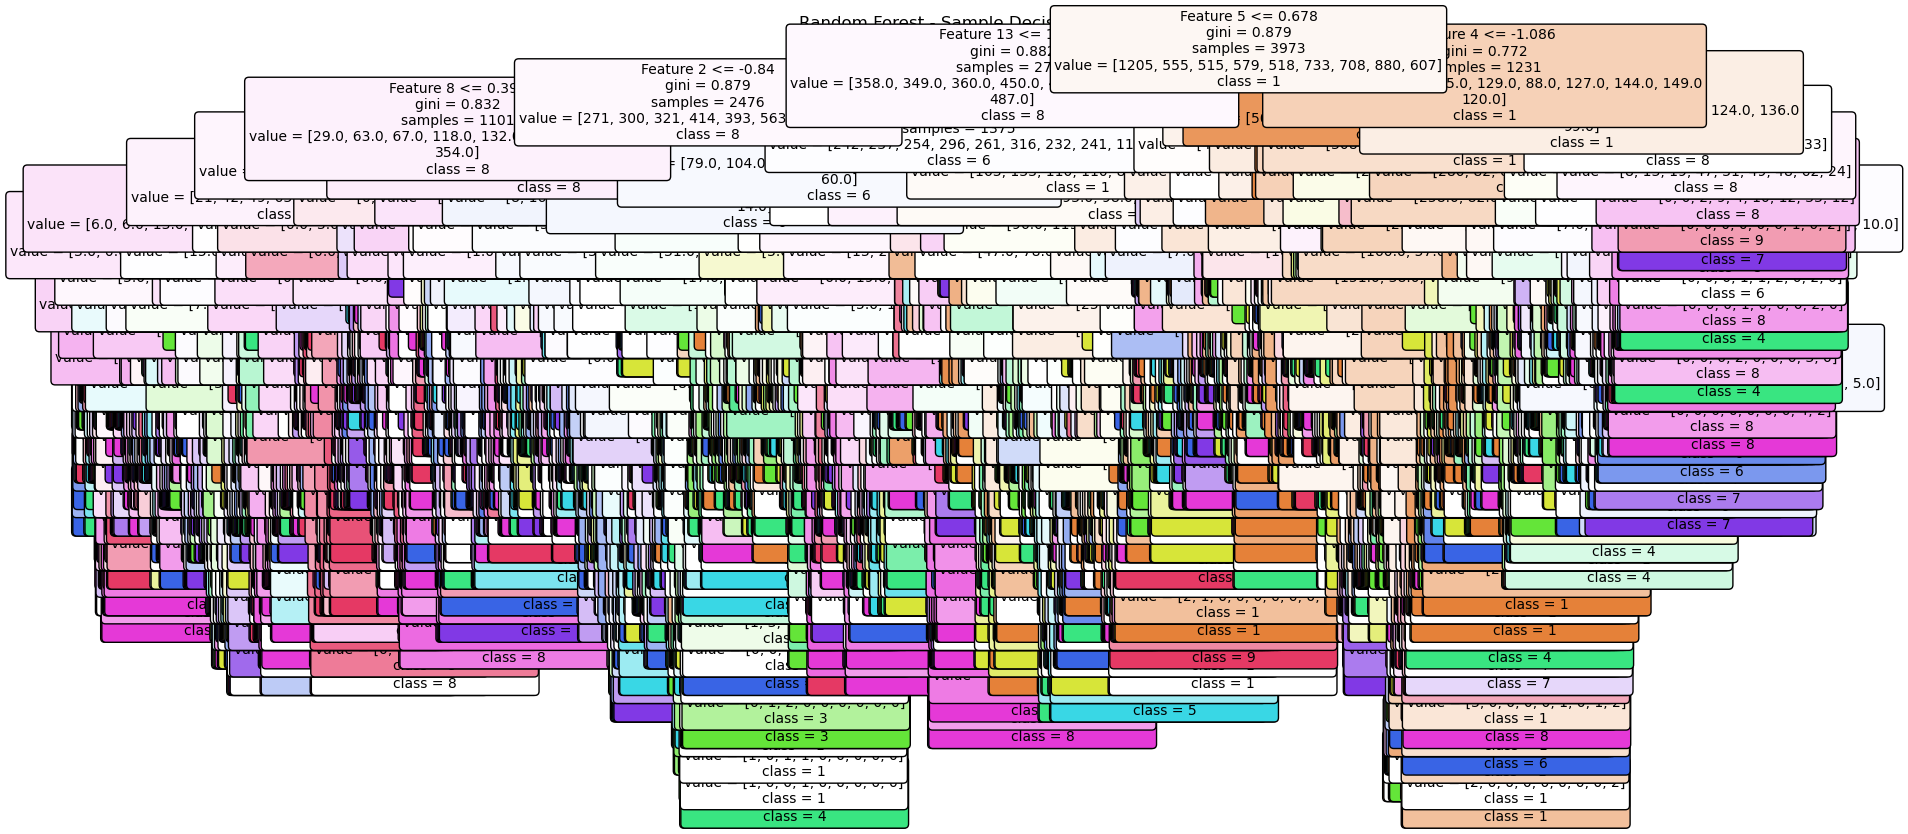


Processing Dataset 4 with Cross-Validation and Visualization...
Loading file: /Users/samyakjain/ML_Project_Jain/TrainData/TrainData4.txt
Data before preprocessing: (2547, 112)
Data after preprocessing and scaling: (2547, 112)
Performing 5-fold cross-validation...
Cross-validation accuracies: [0.95098039 0.94705882 0.96463654 0.96463654 0.96660118]
Mean accuracy: 0.96
Cross-validation completed for /Users/samyakjain/ML_Project_Jain/TrainData/TrainData4.txt. Mean Accuracy: 0.96
Visualizing Feature Importance...


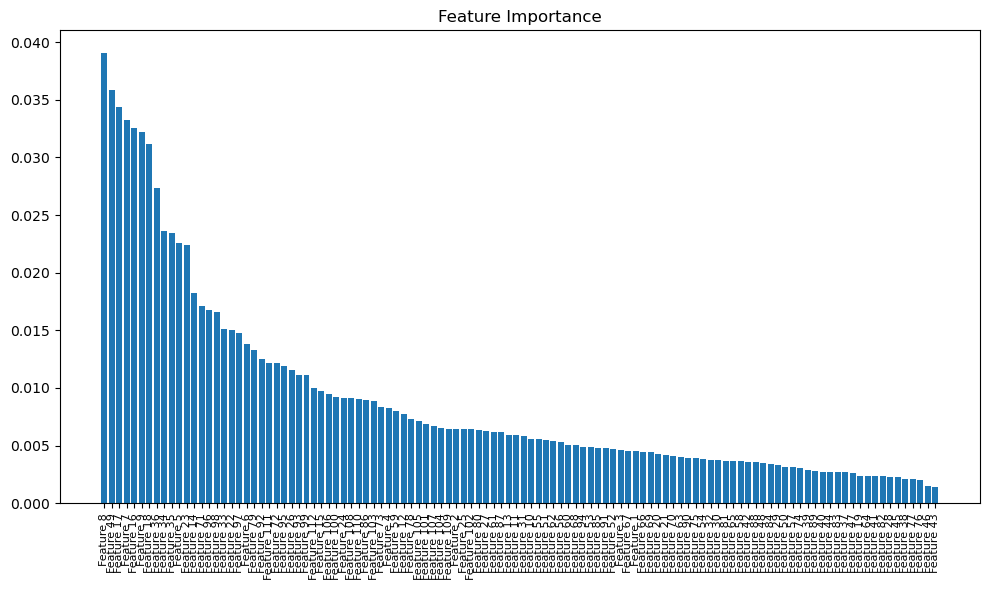

Visualizing a Single Decision Tree...


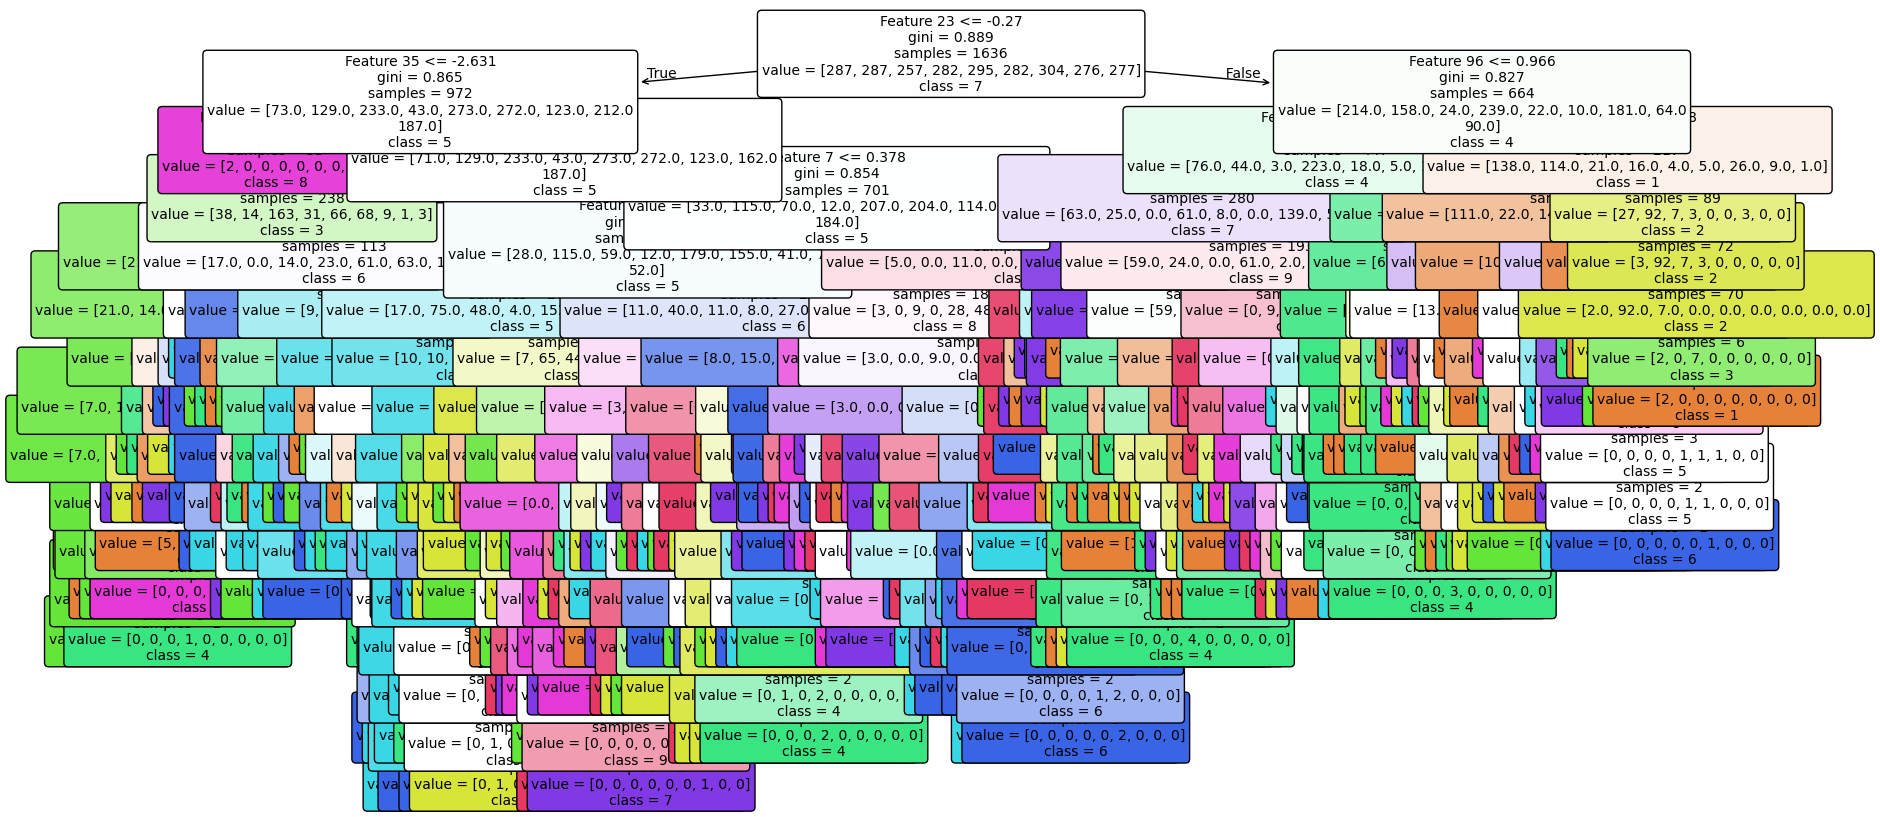


Processing Dataset 5 with Cross-Validation and Visualization...
Loading file: /Users/samyakjain/ML_Project_Jain/TrainData/TrainData5.txt
Data before preprocessing: (1119, 11)
Data after preprocessing and scaling: (1119, 11)
Performing 5-fold cross-validation...
Cross-validation accuracies: [0.70089286 0.625      0.6875     0.66071429 0.68609865]
Mean accuracy: 0.67
Cross-validation completed for /Users/samyakjain/ML_Project_Jain/TrainData/TrainData5.txt. Mean Accuracy: 0.67
Visualizing Feature Importance...


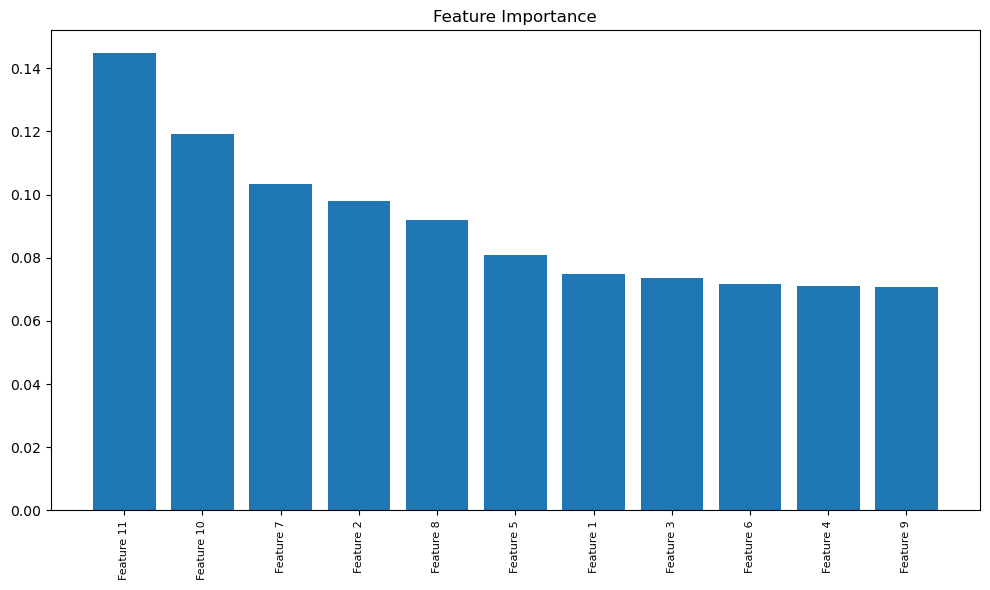

Visualizing a Single Decision Tree...


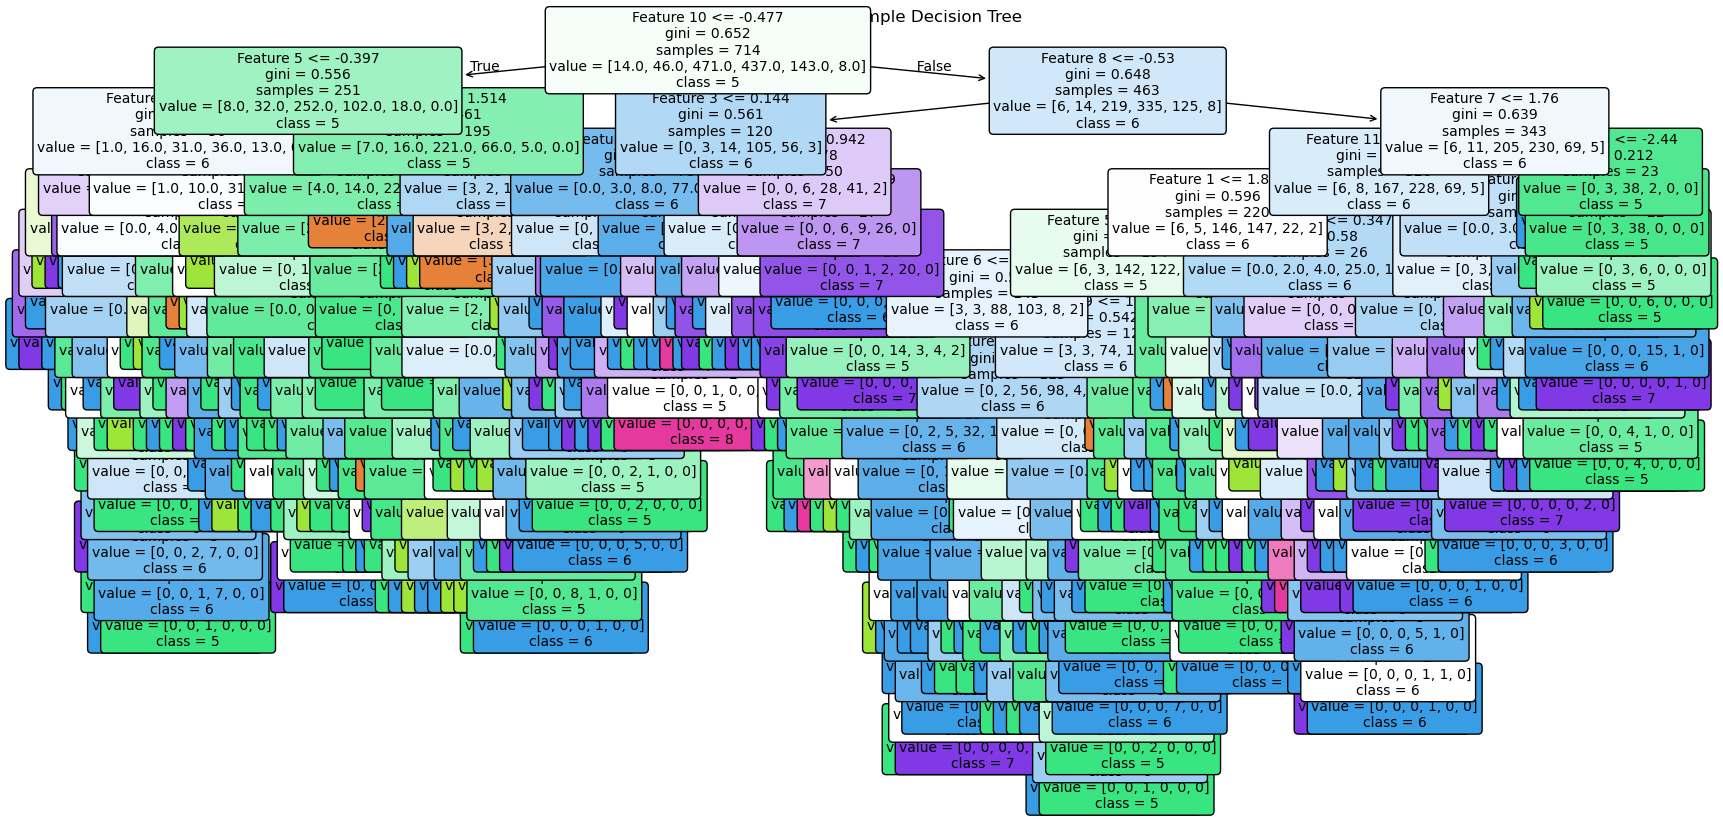


Cross-Validation Results Summary:
Dataset_1: Mean Accuracy = 0.90
Dataset_2: Mean Accuracy = 0.89
Dataset_3: Mean Accuracy = 0.32
Dataset_4: Mean Accuracy = 0.96
Dataset_5: Mean Accuracy = 0.67


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import os
import matplotlib.pyplot as plt


train_data_path = "/Users/samyakjain/ML_Project_Jain/TrainData"
labels_path = "/Users/samyakjain/ML_Project_Jain/TrainLabel"

def load_data(file_path):
    try:
        print(f"Loading file: {file_path}")
        for delimiter in ['\s+', ',', '\t']:
            try:
                df = pd.read_csv(file_path, sep=delimiter, header=None, engine='python')
                df = df.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
                if not df.empty:
                    return df
            except Exception as e:
                continue
        raise ValueError(f"Failed to parse {file_path}. Ensure the format is correct.")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        raise

def preprocess_missing_data(df):
    try:
        print(f"Data before preprocessing: {df.shape}")
        df = df.replace(1.0e+99, np.nan)

        df = df.dropna(axis=0, how='all').dropna(axis=1, how='all')

        if df.empty:
            raise ValueError("All columns or rows were dropped. Ensure the dataset is valid.")

        imputer = SimpleImputer(strategy='mean')
        df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

        scaler = StandardScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

        print(f"Data after preprocessing and scaling: {df_scaled.shape}")
        return df_scaled
    except Exception as e:
        print(f"Error preprocessing data: {e}")
        raise

def plot_feature_importance(model, feature_names):
    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title("Feature Importance")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90, fontsize=8)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error visualizing feature importance: {e}")

def plot_decision_tree(model, feature_names, class_names):
    try:
        plt.figure(figsize=(20, 10))
        plot_tree(model.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
        plt.title("Random Forest - Sample Decision Tree")
        plt.show()
    except Exception as e:
        print(f"Error visualizing decision tree: {e}")

def train_and_visualize_model(X_train, y_train, feature_names):
    try:
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

        print("Visualizing Feature Importance...")
        plot_feature_importance(model, feature_names)

        print("Visualizing a Single Decision Tree...")
        unique_classes = [str(c) for c in np.unique(y_train)]
        plot_decision_tree(model, feature_names, unique_classes)

        return model
    except Exception as e:
        print(f"Error training and visualizing model: {e}")
        raise

def process_single_dataset_with_visualization(train_file, label_file, k=5):
    try:
        train_data = load_data(train_file)
        train_labels = pd.read_csv(label_file, header=None).values.ravel()

        train_data = preprocess_missing_data(train_data)

        model = RandomForestClassifier(random_state=42)
        mean_accuracy = cross_validate_model(train_data, train_labels, model, k=k)
        print(f"Cross-validation completed for {train_file}. Mean Accuracy: {mean_accuracy:.2f}")

        feature_names = [f"Feature {i+1}" for i in range(train_data.shape[1])]
        train_and_visualize_model(train_data, train_labels, feature_names)

        return mean_accuracy
    except Exception as e:
        print(f"Error processing dataset with visualization: {e}")
        raise

def cross_validate_model(X, y, model, k=5):
    try:
        print(f"Performing {k}-fold cross-validation...")
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        print(f"Cross-validation accuracies: {scores}")
        print(f"Mean accuracy: {np.mean(scores):.2f}")
        return np.mean(scores)
    except Exception as e:
        print(f"Error during cross-validation: {e}")
        raise

def process_all_datasets_with_visualization(train_data_path, labels_path, k=5):
    try:
        train_files = sorted([os.path.join(train_data_path, f) for f in os.listdir(train_data_path) if f.endswith('.txt')])
        label_files = sorted([os.path.join(labels_path, f) for f in os.listdir(labels_path) if f.endswith('.txt')])

        results = {}
        for i, (train_file, label_file) in enumerate(zip(train_files, label_files), 1):
            print(f"\nProcessing Dataset {i} with Cross-Validation and Visualization...")
            try:
                mean_accuracy = process_single_dataset_with_visualization(train_file, label_file, k=k)
                results[f"Dataset_{i}"] = mean_accuracy
            except Exception as e:
                print(f"Error processing Dataset {i} with Visualization: {e}")

        print("\nCross-Validation Results Summary:")
        for dataset, accuracy in results.items():
            print(f"{dataset}: Mean Accuracy = {accuracy:.2f}")

    except Exception as e:
        print(f"Error in main cross-validation and visualization loop: {e}")

if __name__ == "__main__":
    process_all_datasets_with_visualization(train_data_path, labels_path, k=5)
